In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv('HousingPriceCalifornia.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
# prompt: delete null values

data.dropna(inplace=True)
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [7]:
# prompt: split the data for train_data

from sklearn.model_selection import train_test_split
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [9]:
# prompt: join again train data

train_data = X_train.join(y_train)
train_data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
17727,-121.80,37.32,14.0,4412.0,924.0,2698.0,891.0,4.7027,<1H OCEAN,227600.0
2057,-119.63,36.64,33.0,1036.0,181.0,620.0,174.0,3.4107,INLAND,110400.0
6453,-118.06,34.12,25.0,3891.0,848.0,1848.0,759.0,3.6639,INLAND,248100.0
4619,-118.31,34.07,28.0,2362.0,949.0,2759.0,894.0,2.2364,<1H OCEAN,305600.0
15266,-117.27,33.04,27.0,1839.0,392.0,1302.0,404.0,3.5500,NEAR OCEAN,214600.0
...,...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24.0,2991.0,500.0,1437.0,453.0,5.4286,<1H OCEAN,273400.0
12081,-117.54,33.76,5.0,5846.0,1035.0,3258.0,1001.0,4.7965,<1H OCEAN,160800.0
5447,-118.42,34.01,42.0,1594.0,369.0,952.0,362.0,3.0990,<1H OCEAN,335400.0
866,-122.04,37.57,12.0,5719.0,1064.0,3436.0,1057.0,5.2879,NEAR BAY,231200.0


In [10]:
train_data.ocean_proximity.value_counts()

,count
ocean_proximity,
<1H OCEAN,7231
INLAND,5156
NEAR OCEAN,2114
NEAR BAY,1842
ISLAND,3


In [11]:
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity, dtype=int)).drop(['ocean_proximity'],axis=1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': '<1H OCEAN'}>,
        <Axes: title={'center': 'INLAND'}>,
        <Axes: title={'center': 'ISLAND'}>],
       [<Axes: title={'center': 'NEAR BAY'}>,
        <Axes: title={'center': 'NEAR OCEAN'}>, <Axes: >, <Axes: >]],
      dtype=object)

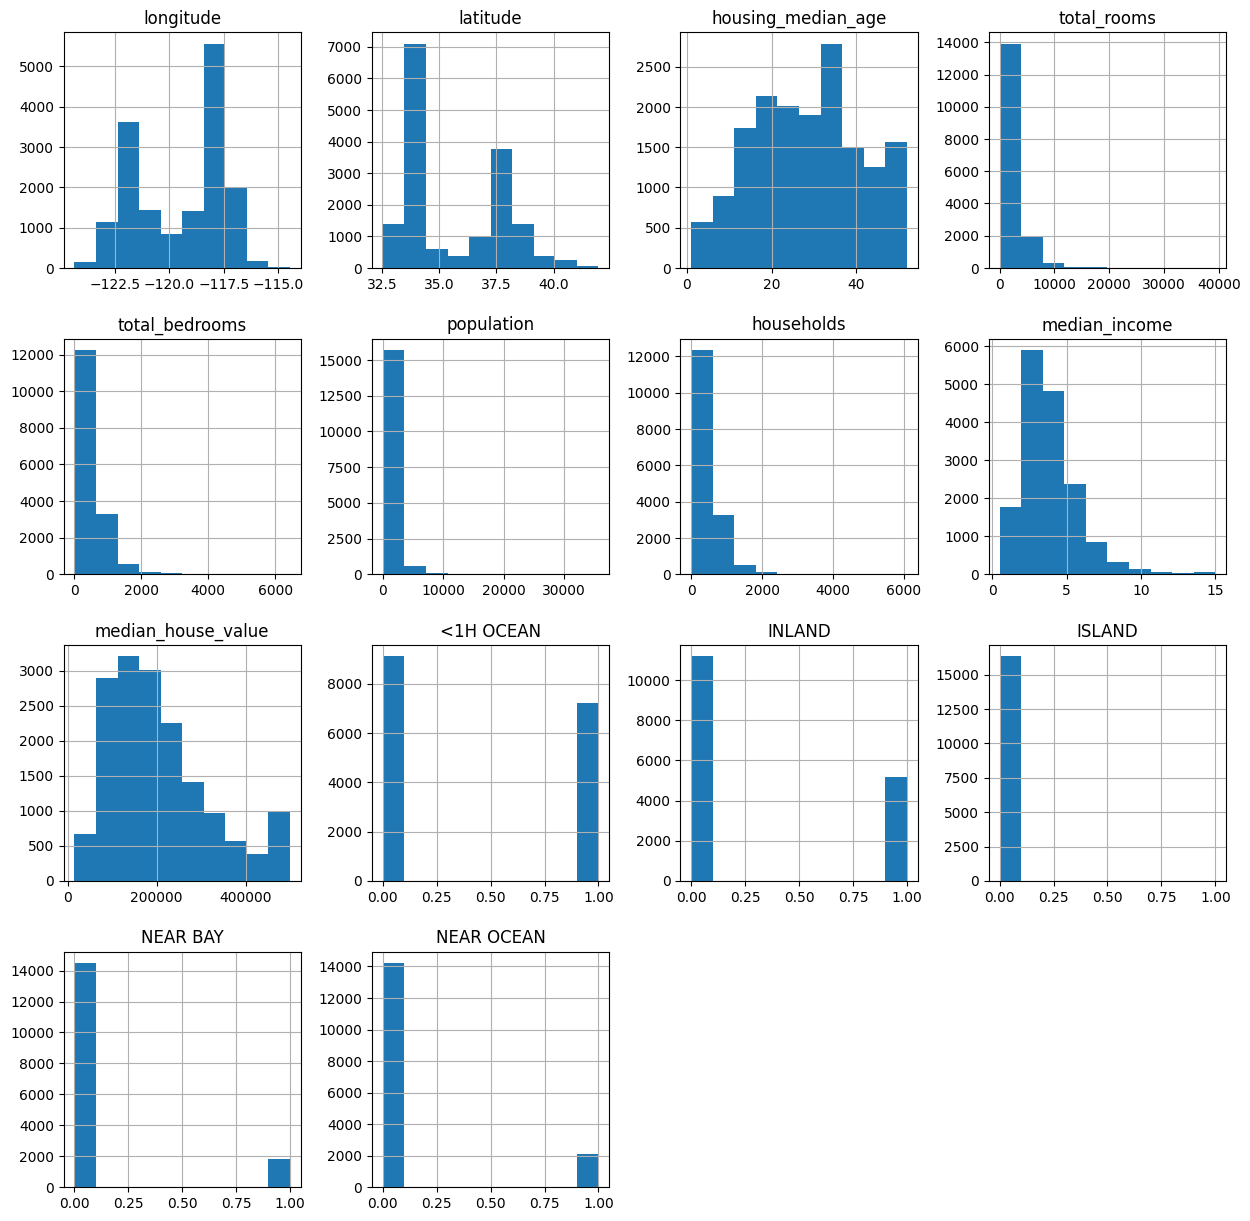

In [12]:
# prompt: create a histogram with plt figsize=15,8

import matplotlib.pyplot as plt

train_data.hist(figsize=(15, 15))


In [13]:
train_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
longitude,1.000000,-0.924340,-0.106111,0.040173,0.066871,0.094641,0.054023,-0.021911,-0.048166,0.318704,-0.050463,0.008492,-0.475731,0.046118
latitude,-0.924340,1.000000,0.009535,-0.033439,-0.066337,-0.106192,-0.071678,-0.073213,-0.141933,-0.445040,0.347245,-0.014571,0.360561,-0.161338
housing_median_age,-0.106111,0.009535,1.000000,-0.359714,-0.319073,-0.291689,-0.301818,-0.120550,0.104041,0.043953,-0.235569,0.016215,0.255591,0.019654
total_rooms,0.040173,-0.033439,-0.359714,1.000000,0.929102,0.851704,0.916829,0.202131,0.136040,-0.004589,0.024758,-0.005975,-0.019720,-0.008668
total_bedrooms,0.066871,-0.066337,-0.319073,0.929102,1.000000,0.872241,0.978582,-0.005364,0.051352,0.019935,-0.009414,-0.002512,-0.019040,0.001575
population,0.094641,-0.106192,-0.291689,0.851704,0.872241,1.000000,0.903093,0.007224,-0.023989,0.073940,-0.022369,-0.008305,-0.058497,-0.023004
households,0.054023,-0.071678,-0.301818,0.916829,0.978582,0.903093,1.000000,0.016608,0.066598,0.044033,-0.041926,-0.006820,-0.009957,0.002544
median_income,-0.021911,-0.073213,-0.120550,0.202131,-0.005364,0.007224,0.016608,1.000000,0.688695,0.163376,-0.234058,-0.009245,0.063391,0.022947
median_house_value,-0.048166,-0.141933,0.104041,0.136040,0.051352,-0.023989,0.066598,0.688695,1.000000,0.258017,-0.482445,0.027272,0.158891,0.135367
<1H OCEAN,0.318704,-0.445040,0.043953,-0.004589,0.019935,0.073940,0.044033,0.163376,0.258017,1.000000,-0.604592,-0.012067,-0.317411,-0.343274


<Axes: >

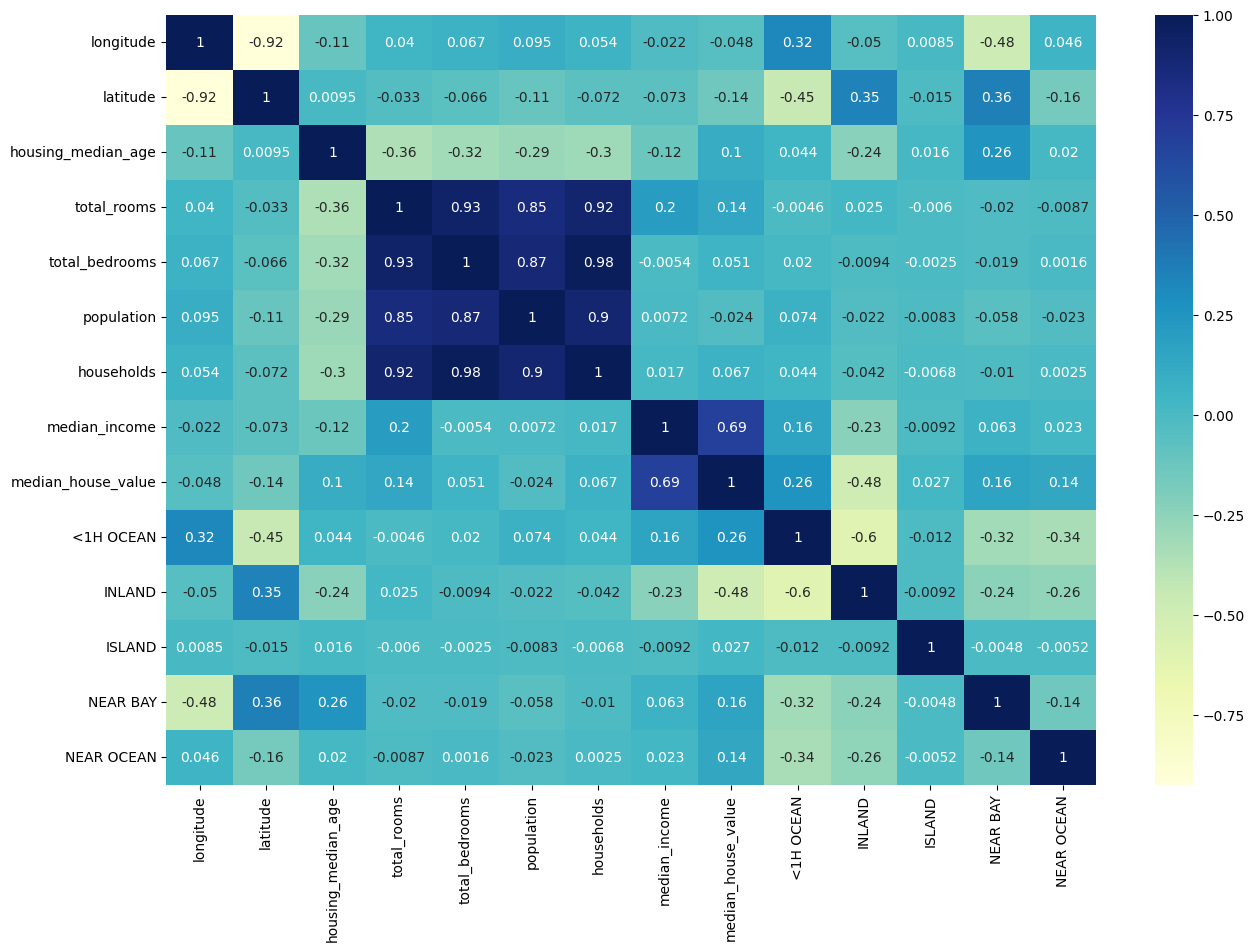

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(train_data.corr(), annot=True,cmap='YlGnBu')

In [15]:
train_data['total_rooms']=np.log(train_data['total_rooms']+1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms']+1)
train_data['population']=np.log(train_data['population']+1)
train_data['households']=np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': '<1H OCEAN'}>,
        <Axes: title={'center': 'INLAND'}>,
        <Axes: title={'center': 'ISLAND'}>],
       [<Axes: title={'center': 'NEAR BAY'}>,
        <Axes: title={'center': 'NEAR OCEAN'}>, <Axes: >, <Axes: >]],
      dtype=object)

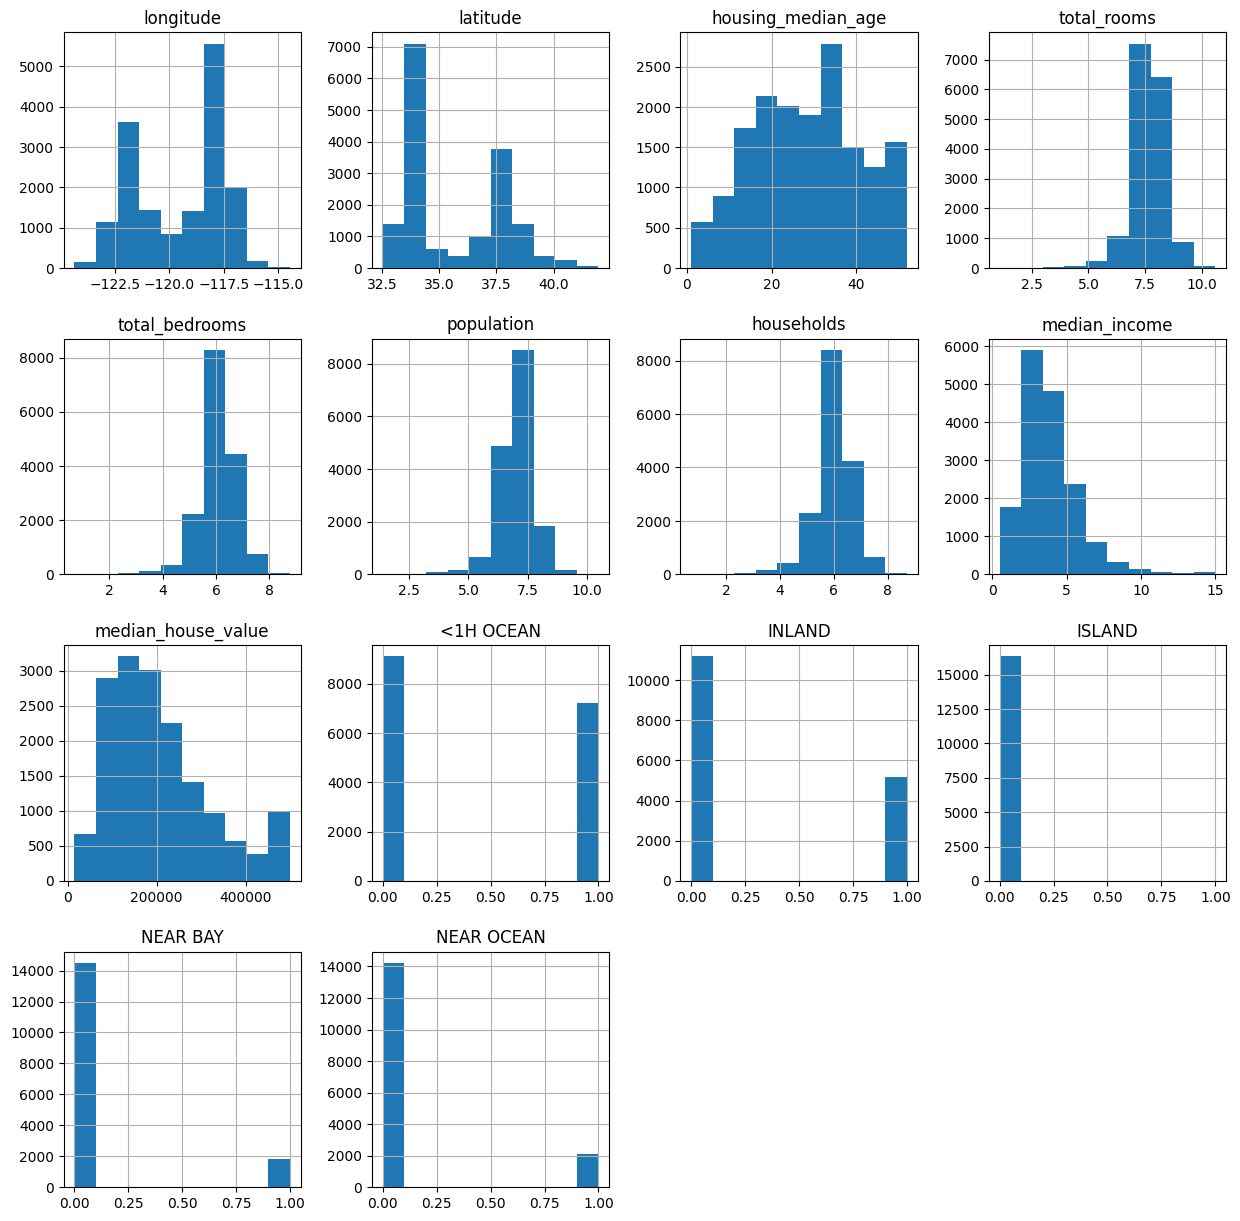

In [16]:
train_data.hist(figsize=(15, 15))

<Axes: xlabel='longitude', ylabel='latitude'>

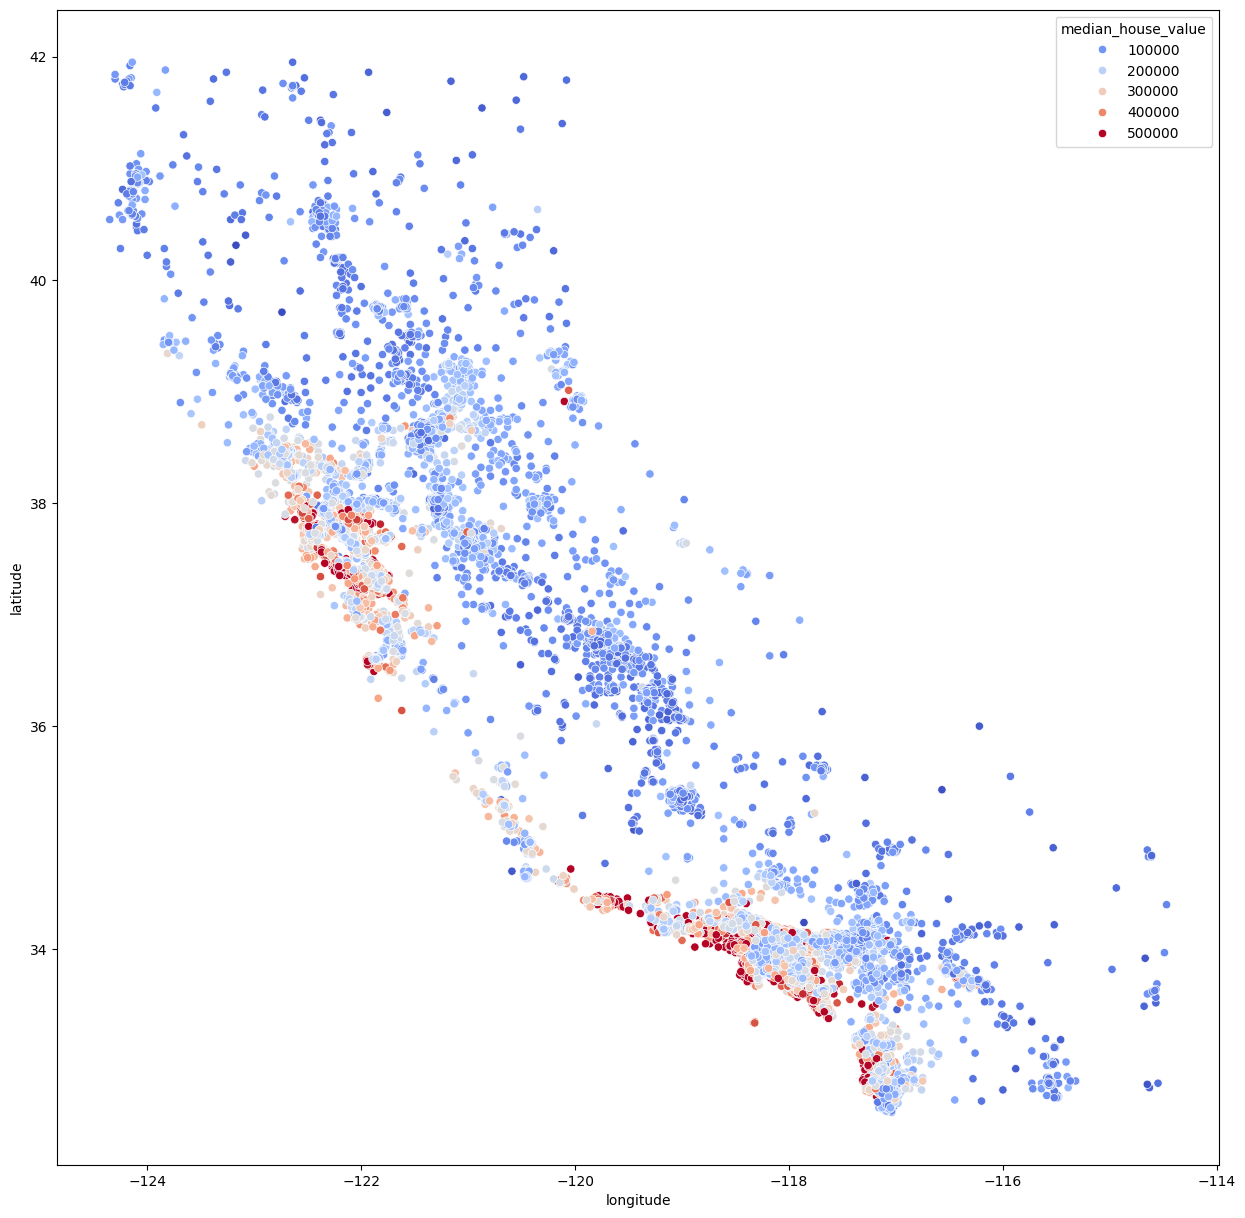

In [17]:

plt.figure(figsize=(15,15))
sns.scatterplot(x='longitude', y='latitude', data=train_data, hue='median_house_value', palette='coolwarm')


In [18]:
# prompt: no of bedroom per room

train_data['bedrooms_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['households_rooms']=train_data['total_rooms']/train_data['households']
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedrooms_ratio,households_rooms
17727,-121.80,37.32,14.0,8.392310,6.829794,7.900637,6.793466,4.7027,227600.0,1,0,0,0,0,0.813816,1.235350
2057,-119.63,36.64,33.0,6.944087,5.204007,6.431331,5.164786,3.4107,110400.0,0,1,0,0,0,0.749416,1.344506
6453,-118.06,34.12,25.0,8.266678,6.744059,7.522400,6.633318,3.6639,248100.0,0,1,0,0,0,0.815812,1.246236
4619,-118.31,34.07,28.0,7.767687,6.856462,7.922986,6.796824,2.2364,305600.0,1,0,0,0,0,0.882690,1.142841
15266,-117.27,33.04,27.0,7.517521,5.973810,7.172425,6.003887,3.5500,214600.0,0,0,0,0,1,0.794652,1.252109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24.0,8.003697,6.216606,7.271009,6.118097,5.4286,273400.0,1,0,0,0,0,0.776717,1.308200
12081,-117.54,33.76,5.0,8.673684,6.943122,8.089176,6.909753,4.7965,160800.0,1,0,0,0,0,0.800481,1.255281
5447,-118.42,34.01,42.0,7.374629,5.913503,6.859615,5.894403,3.0990,335400.0,1,0,0,0,0,0.801871,1.251124
866,-122.04,37.57,12.0,8.651724,6.970730,8.142354,6.964136,5.2879,231200.0,0,0,0,1,0,0.805704,1.242326


<Axes: >

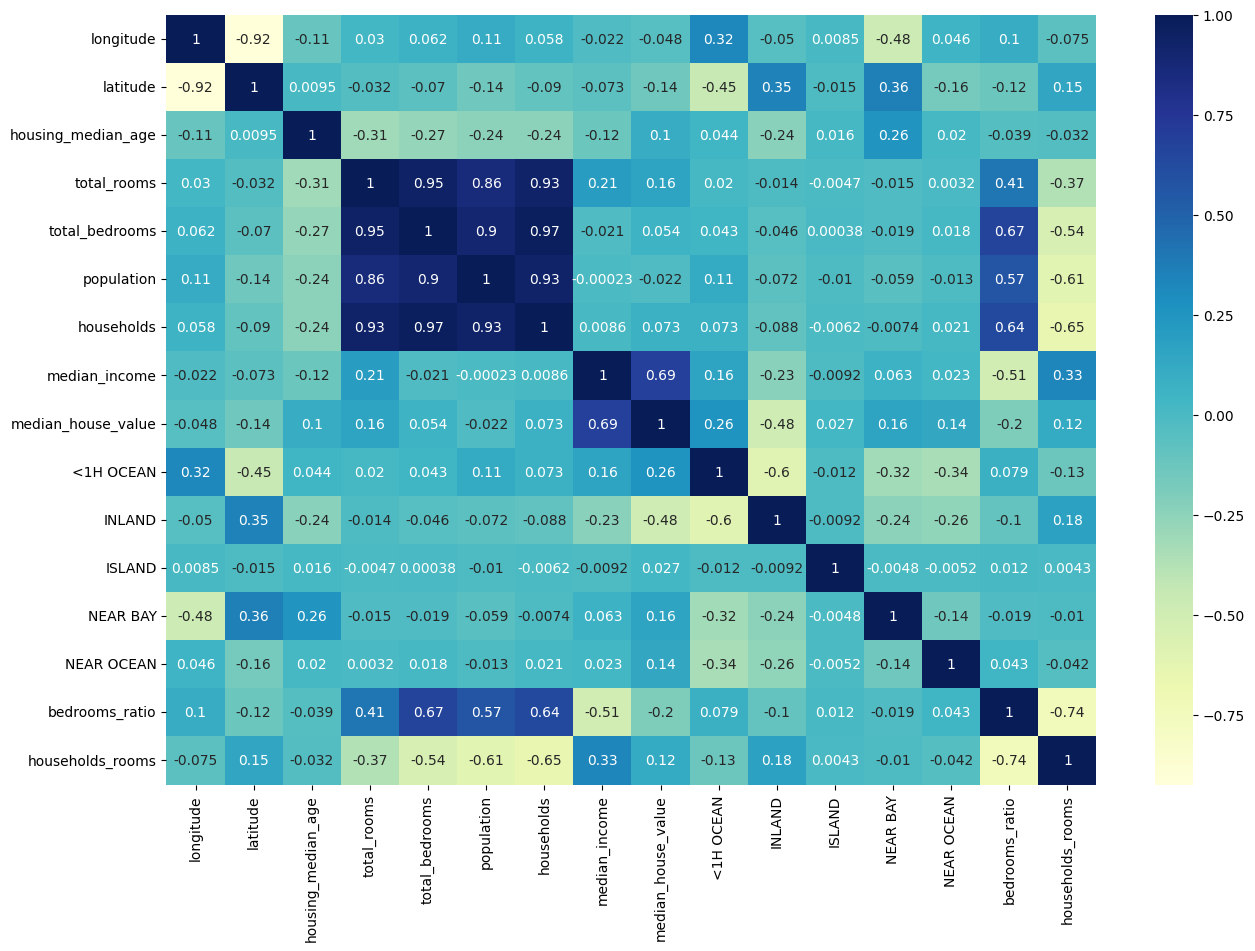

In [19]:
plt.figure(figsize=(15,10))
sns.heatmap(train_data.corr(), annot=True,cmap='YlGnBu')

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train, y_train = train_data.drop(['median_house_value'], axis=1),  train_data['median_house_value']

X_train_s=scaler.fit_transform(X_train)

reg=LinearRegression()
reg.fit(X_train_s,y_train)

LinearRegression()

In [21]:
test_data = X_test.join(y_test)

test_data['total_rooms']=np.log(test_data['total_rooms']+1)
test_data['total_bedrooms']=np.log(test_data['total_bedrooms']+1)
test_data['population']=np.log(test_data['population']+1)
test_data['households']=np.log(test_data['households']+1)

test_data=test_data.join(pd.get_dummies(test_data.ocean_proximity, dtype=int)).drop(['ocean_proximity'],axis=1)


test_data['bedrooms_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['households_rooms']=test_data['total_rooms']/test_data['households']

In [22]:
X_test, y_test = test_data.drop(['median_house_value'], axis=1),  test_data['median_house_value']

In [23]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedrooms_ratio,households_rooms
14416,-117.24,32.79,20.0,6.869014,5.631212,6.265301,5.541264,3.1838,245800.0,0,0,0,0,1,0.819799,1.239612
16383,-121.29,38.01,2.0,8.764678,7.018402,8.110127,6.864848,4.4871,137900.0,0,1,0,0,0,0.800760,1.276748
7731,-118.14,33.92,31.0,8.224700,6.749931,7.746733,6.687109,3.2237,218200.0,1,0,0,0,0,0.820690,1.229934
1410,-122.07,37.94,30.0,7.139660,5.624018,6.562444,5.402677,2.8920,220800.0,0,0,0,1,0,0.787715,1.321504
1335,-121.89,37.99,4.0,7.683404,6.393591,6.834109,6.135565,4.1016,170500.0,0,1,0,0,0,0.832130,1.252273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8291,-118.15,33.76,36.0,7.978311,6.666957,7.076654,6.620073,3.5985,500001.0,0,0,0,0,1,0.835635,1.205170
6274,-117.95,34.03,33.0,7.486053,5.978886,7.325149,5.932245,3.3389,157900.0,1,0,0,0,0,0.798670,1.261926
2997,-119.03,35.32,12.0,7.909122,6.309918,7.166266,6.261492,2.5575,100200.0,0,1,0,0,0,0.797803,1.263137
13440,-117.42,34.08,28.0,7.741099,6.040255,7.180070,6.098074,3.4844,127700.0,0,1,0,0,0,0.780284,1.269433


In [24]:
X_test_s=scaler.transform(X_test)

In [25]:
reg.score(X_test_s,y_test)

0.6687407117584969

In [26]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train_s,y_train)

RandomForestRegressor()

In [27]:
rf.score(X_test_s,y_test)

0.8195617697277167

In [34]:
from sklearn.model_selection import GridSearchCV
forest= RandomForestRegressor()
param_grid={
    "n_estimators":[100,200,300],
    "min_samples_split":[2,4],
    "max_depth":[None,4,8]

}

grid_search=GridSearchCV(forest,param_grid,cv=5,
                         scoring="neg_mean_squared_error",
                         return_train_score= True)
grid_search.fit(X_train_s,y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [30]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [31]:
best_forest=grid_search.best_estimator_

In [32]:
best_forest.score(X_test_s,y_test)

0.8177535490703243